In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.random import set_seed
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [9]:
from google.colab import files
uploaded = files.upload()

Saving jeans_sarees_trousers_labels.npy to jeans_sarees_trousers_labels.npy
Saving jeans_sarees_trousers_photos.npy to jeans_sarees_trousers_photos.npy


In [11]:
x = np.load('jeans_sarees_trousers_photos.npy')
y = np.load('jeans_sarees_trousers_labels.npy')

In [13]:
x.shape

(733, 200, 200, 3)

In [14]:
y.astype(int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [15]:
y = np_utils.to_categorical(y - 1, 3)

In [16]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [17]:
y.shape

(733, 3)

In [18]:
imgsize = 200

In [19]:
x=x/255

In [20]:
x

array([[[[1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686],
         ...,
         [0.08235294, 0.07450981, 0.08627451],
         [0.08235294, 0.07450981, 0.08627451],
         [0.93333334, 0.9254902 , 0.92941177]],

        [[1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686],
         ...,
         [0.09803922, 0.09019608, 0.10196079],
         [0.09803922, 0.09019608, 0.10196079],
         [0.972549  , 0.9647059 , 0.96862745]],

        [[1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686],
         [1.        , 1.        , 0.99215686],
         ...,
         [0.12156863, 0.11372549, 0.1254902 ],
         [0.12156863, 0.11372549, 0.1254902 ],
         [1.        , 0.99607843, 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

In [33]:
set_seed(42) #setting the seed
cnn = Sequential()

# The convolutional layers
cnn.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(imgsize,imgsize,3), kernel_regularizer=regularizers.l1(1e-5)))
cnn.add(layers.MaxPooling2D(pool_size = (2, 2)))
cnn.add(Dropout(.20))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(Dropout(.20))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(Dropout(.20))

# The fully connected layers
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(Dropout(.20))
cnn.add(layers.Dense(3, activation='softmax'))

# Compile the model
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# Fit the model
model = cnn.fit(x_train,y_train, epochs=10, validation_split=0.2, # taking 20 percent of training set for validation
                  callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=3))
cnn.save('model_cnn.h5')

Epoch 1/10
15/15 [==============================] - 2s 95ms/step - loss: 1.1166 - accuracy: 0.3996 - val_loss: 0.6256 - val_accuracy: 0.7119
Epoch 2/10
15/15 [==============================] - 1s 42ms/step - loss: 0.6105 - accuracy: 0.6783 - val_loss: 0.4612 - val_accuracy: 0.8051
Epoch 3/10
15/15 [==============================] - 1s 42ms/step - loss: 0.4304 - accuracy: 0.7842 - val_loss: 0.3753 - val_accuracy: 0.7966
Epoch 4/10
15/15 [==============================] - 1s 43ms/step - loss: 0.3720 - accuracy: 0.8154 - val_loss: 0.3694 - val_accuracy: 0.8136
Epoch 5/10
15/15 [==============================] - 1s 43ms/step - loss: 0.3491 - accuracy: 0.8489 - val_loss: 0.3182 - val_accuracy: 0.8390
Epoch 6/10
15/15 [==============================] - 1s 44ms/step - loss: 0.3056 - accuracy: 0.8516 - val_loss: 0.3593 - val_accuracy: 0.8136
Epoch 7/10
15/15 [==============================] - 1s 42ms/step - loss: 0.2782 - accuracy: 0.8758 - val_loss: 0.3243 - val_accuracy: 0.8390
Epoch 8/10
15

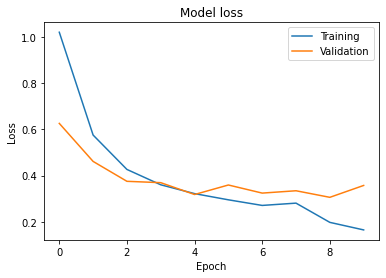

In [34]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


In [35]:
print("Accuracy : ", cnn.evaluate(x_test, y_test))

5/5 [==============================] - 0s 70ms/step - loss: 0.4605 - accuracy: 0.7823
Accuracy :  [0.46046537160873413, 0.7823129296302795]


In [36]:
# Prediction on the test image
cnn_pred = cnn.predict(x_test, verbose=1)
cnn_pred = np.argmax(cnn_pred, axis=1) # this will pick the value in an array having the maximum score

5/5 [==============================] - 0s 13ms/step


In [46]:
cnn_pred[7]

1

In [39]:
y_test.shape

(147, 3)

In [47]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

0

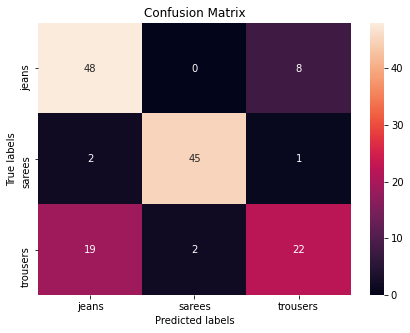

In [48]:
# Confusion matrix for results
cm = confusion_matrix(rounded_labels, cnn_pred)

fig, ax= plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); # annot=True to annotate cells. 'fmt' prevents the numbers from going to scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['jeans','sarees','trousers']); ax.yaxis.set_ticklabels(['jeans','sarees','trousers']);


In [51]:
test_labels=rounded_labels.tolist() # converting the test_labels into a list 

# Creating a function which picks random images and identifies the class to which the image belongs
def get_image_and_class(size):
  idx = np.random.randint(len(x_test), size=size) # generating a random image from the test data
  for i in range(len(idx)):
    plt.imshow(x_test[idx,:][i]) 
    plt.show()
    
  # Print the class of the random image picked above
    if test_labels[idx[i]] == 1:
      print('This is a sarees!')
    elif test_labels[idx[i]] == 0:
      print('This is a jeans!')
    elif test_labels[idx[i]] == 2:
      print('This is a trousers!')
    

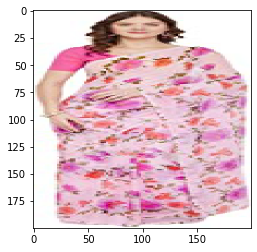

This is a sarees!


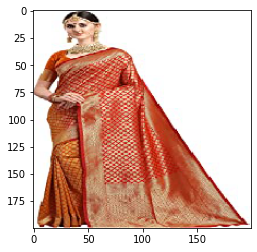

This is a sarees!


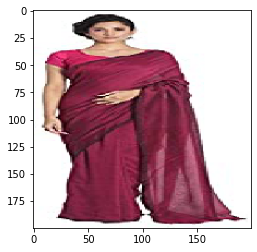

This is a sarees!


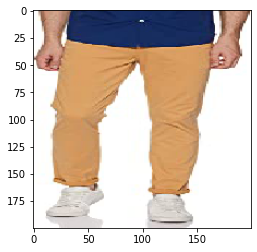

This is a trousers!


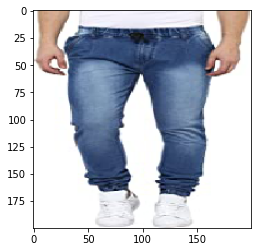

This is a jeans!


In [52]:
get_image_and_class(5)